In [11]:
import os
import sys
import io
import torch 
import numpy as np
import pandas as pd
from collections import OrderedDict

%pylab inline
rcParams["figure.figsize"] = (16,5)
sys.path.append('/home/erogol/projects/')

import librosa
import librosa.display

from TTS.models.tacotron import Tacotron 
from TTS.layers import *
from TTS.utils.data import *
from TTS.utils.audio import AudioProcessor
from TTS.utils.generic_utils import load_config
from TTS.utils.text import text_to_sequence

import IPython
from IPython.display import Audio
from utils import visualize

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Constants
ROOT_PATH = '../result/January-26-2018_09:10AM/'
MODEL_PATH = ROOT_PATH + '/checkpoint_27600.pth.tar'
CONFIG_PATH = ROOT_PATH + '/config.json'
OUT_FOLDER = ROOT_PATH + '/test/'
CONFIG = load_config(CONFIG_PATH)
use_cuda = False
hop_length = 250

In [7]:
# read dataset meta file
WAV_PATH = '/data/shared/KeithIto/LJSpeech-1.0/wavs/'
df = pd.read_csv('/data/shared/KeithIto/LJSpeech-1.0/metadata.csv', delimiter='|')
print(df.shape)

(13099, 3)


In [48]:
ap = AudioProcessor(CONFIG.sample_rate, CONFIG.num_mels, CONFIG.min_level_db,
                    CONFIG.frame_shift_ms, CONFIG.frame_length_ms, CONFIG.preemphasis,
                    CONFIG.ref_level_db, CONFIG.num_freq, CONFIG.power, griffin_lim_iters=80)

def compute_spectrogram(file_name):
    w = librosa.load(file_name, CONFIG.sample_rate)[0]
    spec = ap.spectrogram(w)
    return spec, w
    
def plot_spectrogram(spec):
    figure(figsize=(16, 8))
    librosa.display.specshow(spec.T, sr=CONFIG.sample_rate,
                             hop_length=hop_length, x_axis='time',
                             y_axis='linear')
    xlabel('Time', fontsize=16)
    ylabel("HZ", fontsize=16)
    tight_layout()
    colorbar()

In [46]:
file_name = df.iloc[1,0] 
file_name = WAV_PATH + file_name + '.wav'
spec, w = compute_spectrogram(file_name)

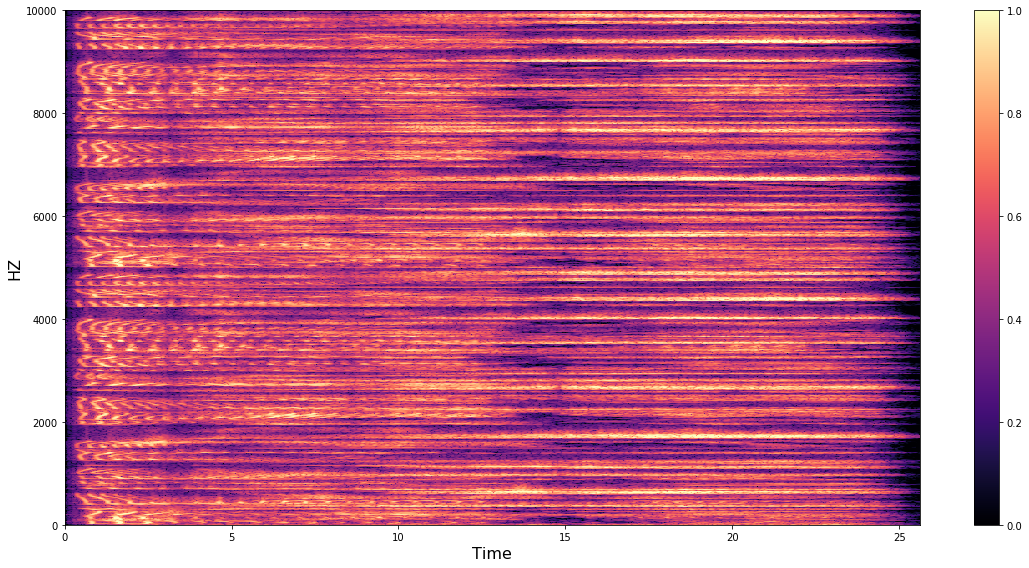

In [54]:
spec2 = np.concatenate([spec, spec], axis=1)
hop_length=hop_length*2
plot_spectrogram(spec2)

In [47]:
IPython.display.display(Audio(w, rate=CONFIG.sample_rate))

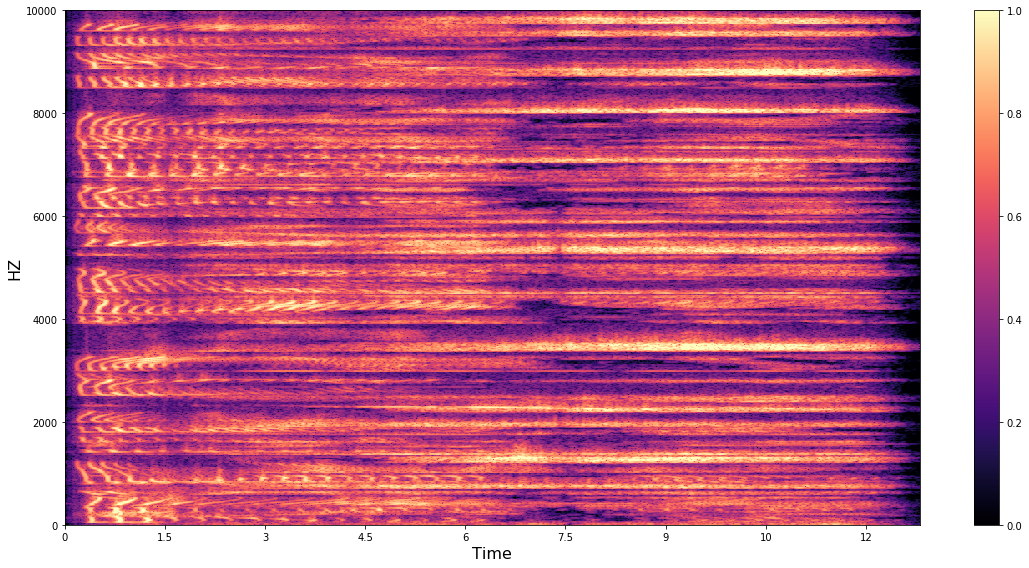

In [49]:
plot_spectrogram(spec)